#Q No 1 Sentimental Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer

import warnings 
warnings.filterwarnings('ignore')

import re
import string

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [3]:
tweets=pd.read_csv('Elon_musk.csv',encoding='cp1252')

In [4]:
tweets

Unnamed: 0                                               Text
0              1                             @kunalb11 I’m an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [5]:
tweets.shape

(1999, 2)

In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [7]:
tweets.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweets

Text
0                                @kunalb11 I’m an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

Data Exploration


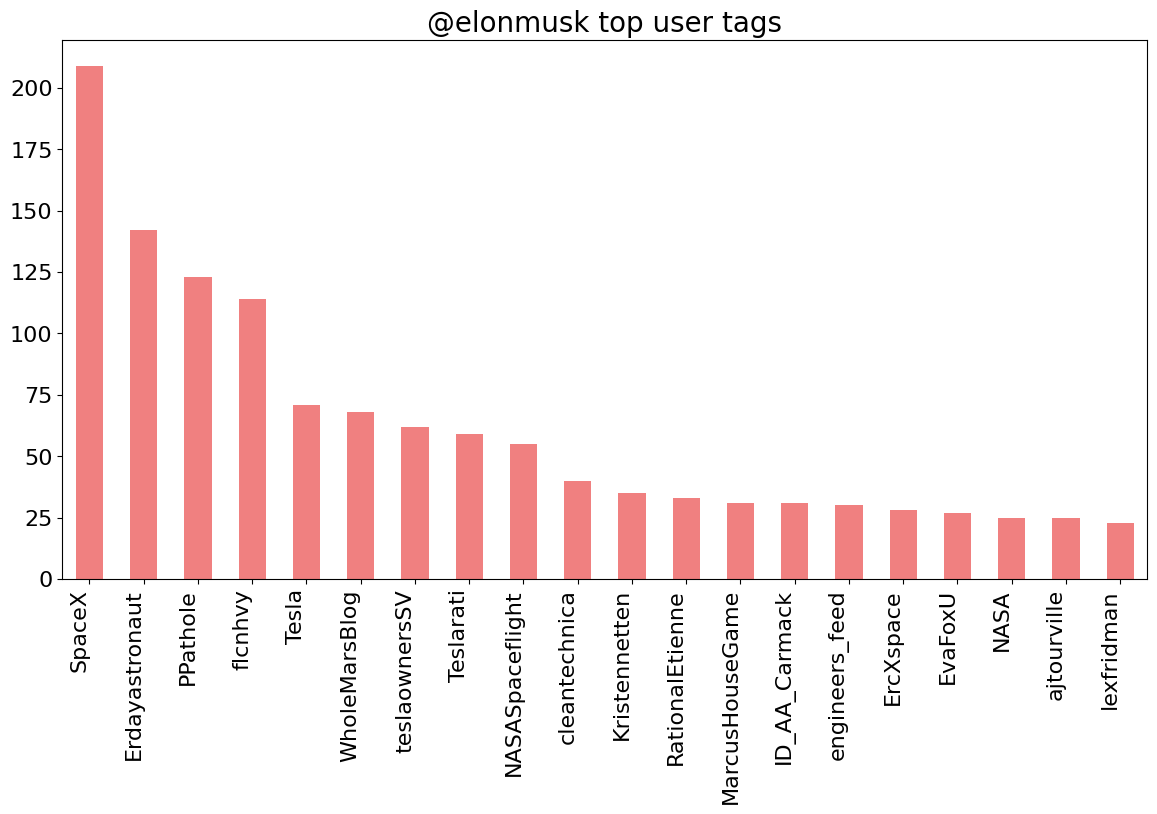

In [8]:
import itertools

c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

Cleaning the text by removing irrelevant information

In [9]:
def clean_text(text):
  text=text.lower()
  text=re.sub('\[.*?\]','',text)
  text= re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub("[0-9" "]+"," ",text)
  text = re.sub('[‘’“”…]', '', text)
  return text

clean = lambda x: clean_text(x)

tweets["Text"] = tweets["Text"].apply(clean_text) # Clean The Text
tweets.head(11)

Text
0                                         im an alien
1   idaacarmack ray tracing on cyberpunk with hdr ...
2                    joerogan spotify great interview
3                              doge is underestimated
4   teslacn congratulations tesla china for amazin...
5                           happy new year of the ox 
6   frodo was the underdoge\nall thought he would ...
7                    owensparks flcnhvy  haha thanks 
8   flcnhvy  indeed tweets definitely do not repre...
9    the most entertaining outcome is the most likely
10                        givedirectly just sent some

In [10]:
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
dtype: int64

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
#Word Frequency after Removal of Stopwatch
freq_stp = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
dtype: int64

Basic Feature Extaction

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [14]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(tweets["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

term  occurrences  frequency
0         aber            1   0.000076
1         able            6   0.000453
2          abo            1   0.000076
3       aboard            1   0.000076
4        abort            3   0.000227
5      absence            1   0.000076
6     absolute            1   0.000076
7   absolutely           15   0.001133
8       absorb            1   0.000076
9   absorption            1   0.000076
10      absurd            2   0.000151

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

able  abort  absolutely  access  accurate  actual  actually  adamklotz  \
0      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
2      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
3      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
4      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
...    ...    ...         ...     ...       ...     ...       ...        ...   
1994   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1995   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1996   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1997   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1998   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   

      add  adding  ...  yeah      year  years  yes  yesterdays  youre  \
0     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
2     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
3     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
4     0.0     0.0  ...   0.0  0.356742    0.0  0.0         0.0    0.0   
...   ...     ...  ...   ...       ...    ...  ...         ...    ...   
1994  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1995  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1996  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1997  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1998  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   

      yourfavgas  yup  zero  zone  
0            0.0  0.0   0.0   0.0  
1            0.0  0.0   0.0   0.0  
2            0.0  0.0   0.0   0.0  
3            0.0  0.0   0.0   0.0  
4            0.0  0.0   0.0   0.0  
...          ...  ...   ...   ...  
1994         0.0  0.0   0.0   0.0  
1995         0.0  0.0   0.0   0.0  
1996         0.0  0.0   0.0   0.0  
1997         0.0  0.0   0.0   0.0  
1998         0.0  0.0   0.0   0.0  

[1999 rows x 1000 columns]

In [16]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [17]:
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

Bi-gram  Freq
0                 rt spacex    71
1             spacex falcon    17
2     erdayastronaut spacex    16
3               pretty much    12
4                   rt nasa    12
5              waemd spacex    11
6               giga berlin    10
7               first stage    10
8   teslaratiteam teslarati    10
9               nasa spacex     9
10             falcon first     9

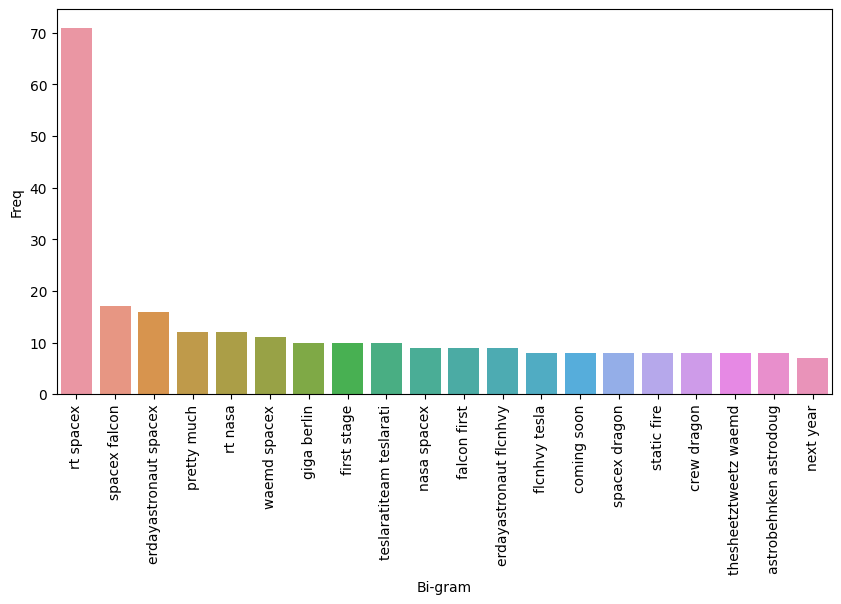

In [18]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [19]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [20]:
top3_words = get_top_n3_words(tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

Tri-gram  Freq
0                        rt spacex falcon    17
1                      falcon first stage     9
2                     spacex falcon first     8
3            thesheetztweetz waemd spacex     8
4                       course still love     7
5          ppathole thesheetztweetz waemd     7
6             waemd spacex spacexstarlink     7
7                      first stage landed     6
8                       rt spacex liftoff     6
9   spacex spacexstarlink wanationalguard     6
10    spacex felixschlang marcushousegame     5

[Text(0, 0, 'rt spacex falcon'),
 Text(1, 0, 'falcon first stage'),
 Text(2, 0, 'spacex falcon first'),
 Text(3, 0, 'thesheetztweetz waemd spacex'),
 Text(4, 0, 'course still love'),
 Text(5, 0, 'ppathole thesheetztweetz waemd'),
 Text(6, 0, 'waemd spacex spacexstarlink'),
 Text(7, 0, 'first stage landed'),
 Text(8, 0, 'rt spacex liftoff'),
 Text(9, 0, 'spacex spacexstarlink wanationalguard'),
 Text(10, 0, 'spacex felixschlang marcushousegame'),
 Text(11, 0, 'still love droneship'),
 Text(12, 0, 'rt spacex dragon'),
 Text(13, 0, 'first operational mission'),
 Text(14, 0, 'casparstanley ercxspace marcushousegame'),
 Text(15, 0, 'ercxspace marcushousegame felixschlang'),
 Text(16, 0, 'erdayastronaut joshbickett ajtourville'),
 Text(17, 0, 'joshbickett ajtourville spacex'),
 Text(18, 0, 'spacex falcon launches'),
 Text(19, 0, 'tjcooney lrocket spacex')]

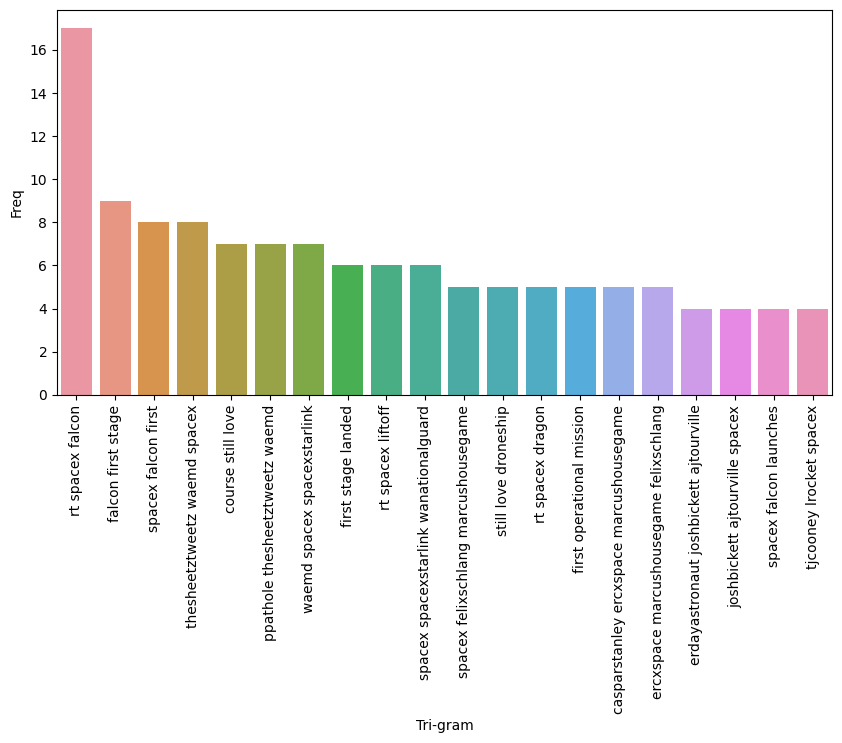

In [21]:
top20_trigram=top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])

In [22]:
string_Total=" ".join(tweets['Text'])

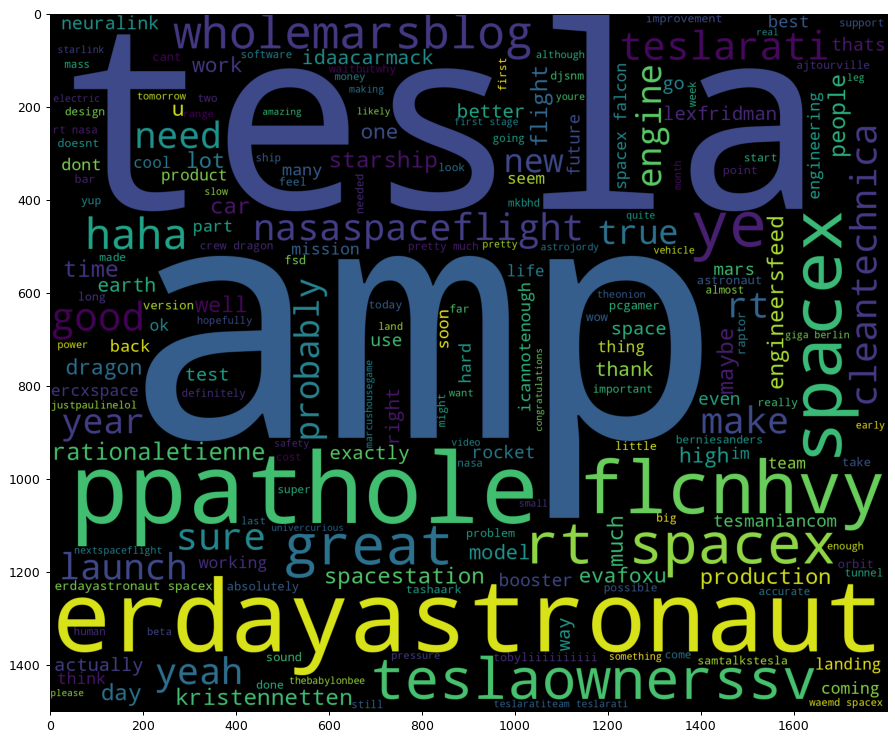

In [23]:
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

In [24]:
#Subjectivity and Polarity
from textblob import TextBlob

# Getting The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head(11)

Text  subjectivity  polarity
0                                            im alien      0.750000 -0.250000
1   idaacarmack ray tracing cyberpunk hdr nextleve...      0.000000  0.000000
2                    joerogan spotify great interview      0.750000  0.800000
3                                 doge underestimated      0.000000  0.000000
4   teslacn congratulations tesla china amazing ex...      0.322222  0.200000
5                                   happy new year ox      0.727273  0.468182
6   frodo underdoge thought would fail httpstcozgx...      0.300000 -0.500000
7                      owensparks flcnhvy haha thanks      0.250000  0.200000
8   flcnhvy indeed tweets definitely represent rea...      0.500000  0.000000
9                         entertaining outcome likely      0.850000  0.250000
10                                  givedirectly sent      0.000000  0.000000

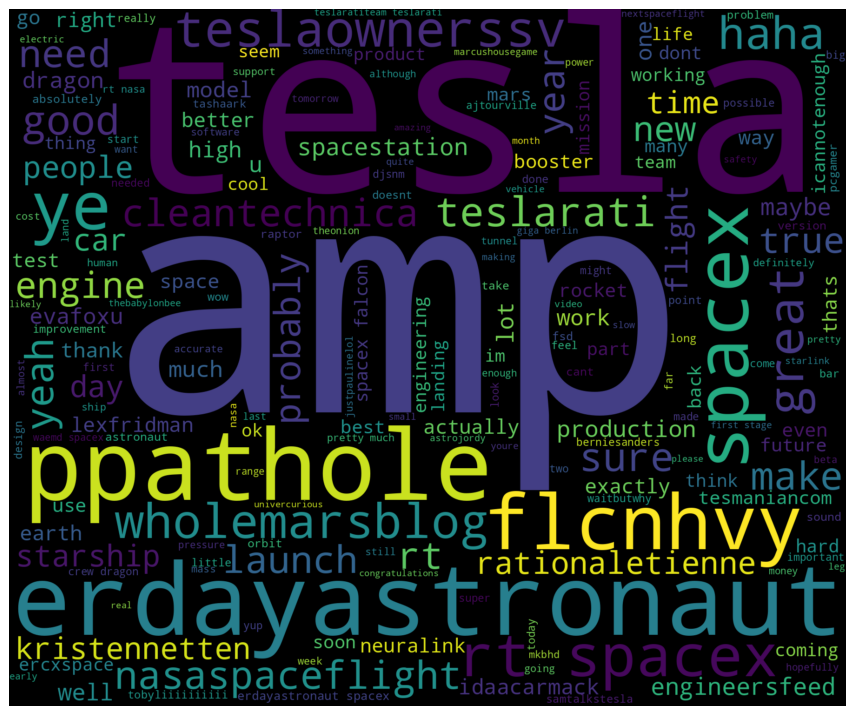

In [25]:
allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [26]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [27]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
tweets["analysis"] = tweets["polarity"].apply(analysis)

In [28]:
positive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


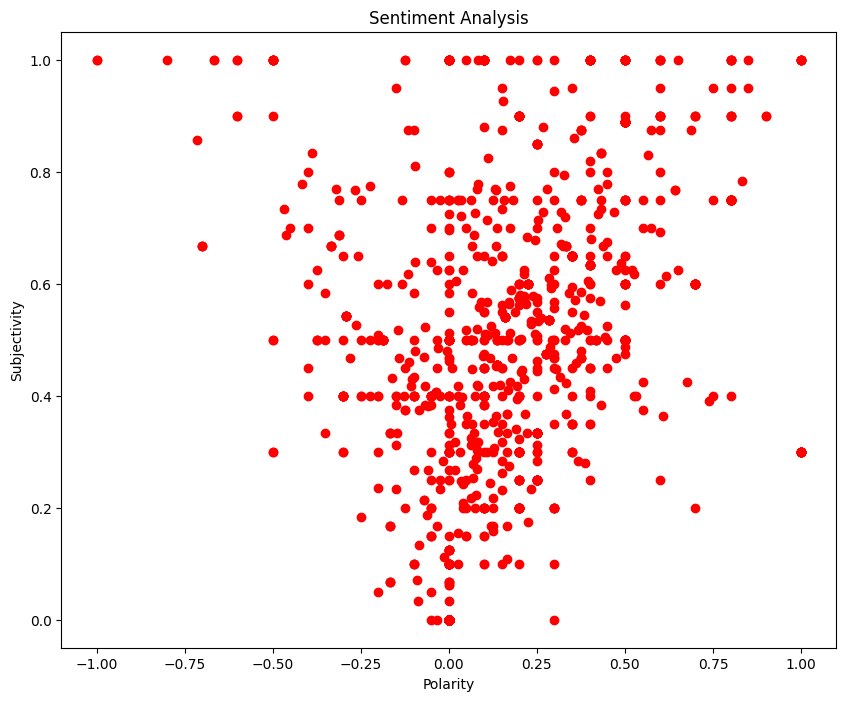

In [29]:
plt.figure(figsize=(10, 8))

for i in range(0, tweets.shape[0]):
    plt.scatter(tweets["polarity"][i], tweets["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") 
plt.xlabel("Polarity") 
plt.ylabel("Subjectivity") 
plt.show() 

In [30]:
(len(positive_tweets) / len(negative_tweets))*100

422.11055276381904

**The ratio of Positive words is large in size so we can conclude that Elon Musk is Positive** **person**

#Q.NO 2 

In [31]:
import spacy
import codecs
import requests
import re
import nltk 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

Multi page web scraping

In [32]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}


In [33]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [34]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [35]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [36]:
df = pd.DataFrame(reviewlist)
df

Title  Rating  \
0     Good build quality & display. But not very smart.     3.0   
1                          Good product daily ware able     4.0   
2     Ita is an ok product....better to buy a good f...     3.0   
3                                      Worth the price!     4.0   
4                                  Awesome Battery life     4.0   
...                                                 ...     ...   
1595                      Good smartwatch at this price     5.0   
1596                                    Stopped working     1.0   
1597                              This is what you need     4.0   
1598                                             Nice 🥰     5.0   
1599                                     Surely awesome     5.0   

                                                 Review  \
0     Skipping the parts mostly covered in other rev...   
1     The media could not be loaded.\n              ...   
2     The media could not be loaded.\n              ...   
3     The media could not be loaded.\n              ...   
4     The battery life of the watch is really incred...   
...                                                 ...   
1595  So far, I am enjoying the watch. The price was...   
1596  Stopped working after 20 days, showing wrong time   
1597  This is what companies want --> quantity over ...   
1598                                                      
1599  Super impressed with this, paired it easily to...   

                                Review_Date  
0        Reviewed in India on 9 August 2022  
1        Reviewed in India on 26 April 2023  
2      Reviewed in India on 17 October 2022  
3       Reviewed in India on 26 August 2022  
4         Reviewed in India on 9 April 2023  
...                                     ...  
1595  Reviewed in India on 12 November 2022  
1596   Reviewed in India on 18 October 2022  
1597    Reviewed in India on 25 August 2022  
1598  Reviewed in India on 19 November 2022  
1599   Reviewed in India on 7 November 2022  

[1600 rows x 4 columns]

In [37]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)


In [38]:
df.head(50)

Title  Rating  \
0   Good build quality & display. But not very smart.     3.0   
1                        Good product daily ware able     4.0   
2   Ita is an ok product....better to buy a good f...     3.0   
3                                    Worth the price!     4.0   
4                                Awesome Battery life     4.0   
5                                                  ..     4.0   
6                                 It's a good product     4.0   
7                                           Don't buy     3.0   
8                                         Sound issue     3.0   
9                                                Good     3.0   
10  Good build quality & display. But not very smart.     3.0   
11                       Good product daily ware able     4.0   
12  Ita is an ok product....better to buy a good f...     3.0   
13                                   Worth the price!     4.0   
14                               Awesome Battery life     4.0   
15                                                 ..     4.0   
16                                It's a good product     4.0   
17                                          Don't buy     3.0   
18                                        Sound issue     3.0   
19                                               Good     3.0   
20  Medicore watch, but could be better build wise...     3.0   
21  Silent mode or volume control feature not avai...     3.0   
22                                  Not good quality.     3.0   
23                                               Good     4.0   
24                                        Watch Faces     4.0   
25                                       Good product     3.0   
26  Good but could have been better for a RS 3500 ...     3.0   
27                     All good except for few things     4.0   
28                                               Good     4.0   
29                                            It's ok     4.0   
30                                               Good     4.0   
31               Touch is very good and great display     4.0   
32                      Watch is good in price range.     4.0   
33                                     Good stuff but     4.0   
34                                          Excellent     5.0   
35                                  I like this watch     4.0   
36                                           Worth it     4.0   
37                       Just to have the things done     3.0   
38                                       Good product     4.0   
39                  Worth it by range with BT calling     4.0   
40                                      Outstanding..     4.0   
41     Review after 2 weeks!! Overall Good Experience     4.0   
42                                Bluetooth,  speaker     3.0   
43            Help to connect calling and health care     3.0   
44                                            Quality     4.0   
45  Sensors are not accurate, Bluetooth calling is...     3.0   
46  Watch is good, but the app is not!!! So no use...     2.0   
47                I didnt see any silent option in it     4.0   
48                               BT connect very poor     3.0   
49      Review after 2 hours of owning Boat Xtend Pro     3.0   

                                               Review        Review_Date  
0   Skipping the parts mostly covered in other rev...      9 August 2022  
1   The media could not be loaded.\n              ...      26 April 2023  
2   The media could not be loaded.\n              ...    17 October 2022  
3   The media could not be loaded.\n              ...     26 August 2022  
4   The battery life of the watch is really incred...       9 April 2023  
5                                           Great pdt      19 April 2023  
6        Call quality is nice ☺️Display is assume....      26 March 2023  
7   Not what i expected as it gets discharged auto...       9 April 2023  
8   There is no sound when the phone rings, only v...    

In [39]:
df.to_csv("BoatSmartWatch_Review.csv")

In [40]:
#loading dataset
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Title  Rating  \
0     Good build quality & display. But not very smart.     3.0   
1                          Good product daily ware able     4.0   
2     Ita is an ok product....better to buy a good f...     3.0   
3                                      Worth the price!     4.0   
4                                  Awesome Battery life     4.0   
...                                                 ...     ...   
1595                      Good smartwatch at this price     5.0   
1596                                    Stopped working     1.0   
1597                              This is what you need     4.0   
1598                                             Nice 🥰     5.0   
1599                                     Surely awesome     5.0   

                                                 Review        Review_Date  
0     Skipping the parts mostly covered in other rev...      9 August 2022  
1     The media could not be loaded.\n              ...      26 April 2023  
2     The media could not be loaded.\n              ...    17 October 2022  
3     The media could not be loaded.\n              ...     26 August 2022  
4     The battery life of the watch is really incred...       9 April 2023  
...                                                 ...                ...  
1595  So far, I am enjoying the watch. The price was...   12 November 2022  
1596  Stopped working after 20 days, showing wrong time    18 October 2022  
1597  This is what companies want --> quantity over ...     25 August 2022  
1598                                                NaN   19 November 2022  
1599  Super impressed with this, paired it easily to...    7 November 2022  

[1600 rows x 4 columns]

In [41]:
#Data Exploration
reviews.Rating.describe()

count    1600.000000
mean        3.405000
std         1.730707
min         1.000000
25%         1.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [42]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1600 non-null   object 
 1   Rating       1600 non-null   float64
 2   Review       1552 non-null   object 
 3   Review_Date  1600 non-null   object 
dtypes: float64(1), object(3)
memory usage: 50.1+ KB


In [43]:
reviews.isnull().sum()

Title           0
Rating          0
Review         48
Review_Date     0
dtype: int64

In [44]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

Title  Rating  \
0  Good build quality & display. But not very smart.     3.0   
1                       Good product daily ware able     4.0   
2  Ita is an ok product....better to buy a good f...     3.0   
3                                   Worth the price!     4.0   
4                               Awesome Battery life     4.0   

                                              Review       Review_Date  
0  Skipping the parts mostly covered in other rev...     9 August 2022  
1  The media could not be loaded.\n              ...     26 April 2023  
2  The media could not be loaded.\n              ...   17 October 2022  
3  The media could not be loaded.\n              ...    26 August 2022  
4  The battery life of the watch is really incred...      9 April 2023

Data Visualisaton

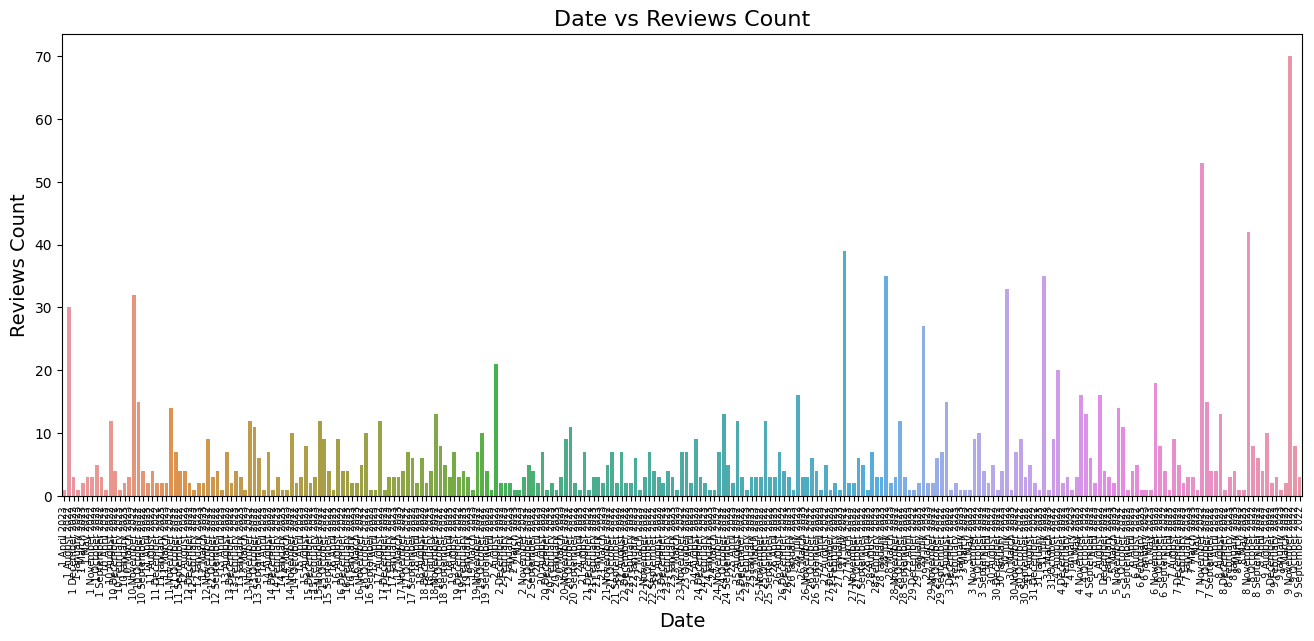

In [45]:
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

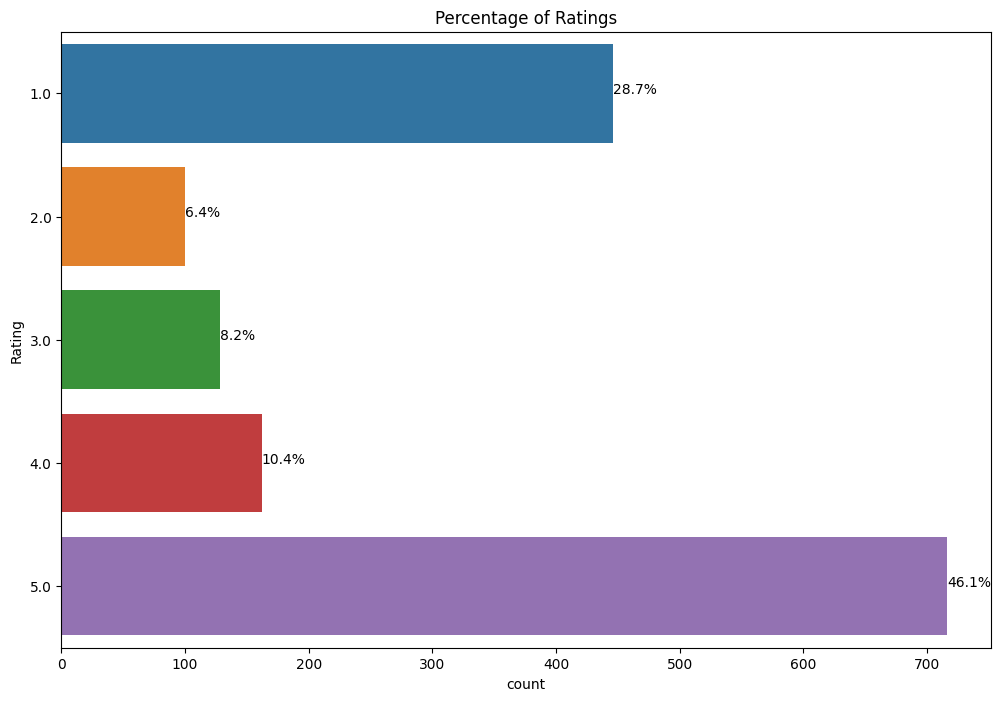

In [46]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [47]:
#Checking and Correction of Spelling
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Shipping the parts mostly covered in other rev...
1    The media could not be loaded.\n              ...
2    The media could not be loaded.\n              ...
3    The media could not be loaded.\n              ...
4    The battery life of the watch is really incred...
Name: Review, dtype: object

In [48]:
boat_review=reviews[['Review']]
boat_review

Review
0     Skipping the parts mostly covered in other rev...
1     The media could not be loaded.\n              ...
2     The media could not be loaded.\n              ...
3     The media could not be loaded.\n              ...
4     The battery life of the watch is really incred...
...                                                 ...
1594  Excellent smartwatch. Worth for what price it ...
1595  So far, I am enjoying the watch. The price was...
1596  Stopped working after 20 days, showing wrong time
1597  This is what companies want --> quantity over ...
1599  Super impressed with this, paired it easily to...

[1552 rows x 1 columns]

In [49]:
boat_review.reset_index(drop=True, inplace=True)
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


In [50]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...


  0%|          | 0/1552 [00:00<?, ?it/s]

In [51]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

Clean_Reviews  \
0  skipping part mostly covered review sponsored ...   
1  medium could loaded boat extend pro reviewshya...   
2  medium could loaded hello good day fan boat de...   
3  medium could loaded got watch today checked fe...   
4  battery life watch really incredible sound qua...   

                                   Uncleaned_Reviews  
0  skipping parts mostly covered reviews sponsore...  
1  the media could loaded. boat extend pro review...  
2  the media could loaded. hello good day,i'm fan...  
3  the media could loaded. got watch today checke...  
4  the battery life watch really incredible sound...

In [52]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [53]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  skipping part mostly covered review sponsored ...   
1  medium could loaded boat extend pro reviewshya...   
2  medium could loaded hello good day fan boat de...   
3  medium could loaded got watch today checked fe...   
4  battery life watch really incredible sound qua...   
5                                          great pdt   
6                   call quality nice display assume   
7  expected get discharged automatically sleeping...   
8                         sound phone ring vibration   
9                                                      

                                   Uncleaned_Reviews  
0  skipping parts mostly covered reviews sponsore...  
1  the media could loaded. boat extend pro review...  
2  the media could loaded. hello good day,i'm fan...  
3  the media could loaded. got watch today checke...  
4  the battery life watch really incredible sound...  
5                                          great pdt  
6             call quality nice ☺️display assume....  
7  not expected gets discharged automatically sle...  
8                 there sound phone rings, vibration  
9                                                 so

In [54]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  skipping part mostly covered review sponsored ...   
1  medium could loaded boat extend pro reviewshya...   
2  medium could loaded hello good day fan boat de...   
3  medium could loaded got watch today checked fe...   
4  battery life watch really incredible sound qua...   
5                                          great pdt   
6                   call quality nice display assume   
7  expected get discharged automatically sleeping...   
8                         sound phone ring vibration   
9                                                      

                                   Uncleaned_Reviews  
0  skipping parts mostly covered reviews sponsore...  
1  the media could loaded. boat extend pro review...  
2  the media could loaded. hello good day,i'm fan...  
3  the media could loaded. got watch today checke...  
4  the battery life watch really incredible sound...  
5                                          great pdt  
6             call quality nice ☺️display assume....  
7  not expected gets discharged automatically sle...  
8                 there sound phone rings, vibration  
9                                                 so

In [55]:
#Removing review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0   skipping part mostly covered review sponsored ...   
1   medium could loaded boat extend pro reviewshya...   
2   medium could loaded hello good day fan boat de...   
3   medium could loaded got watch today checked fe...   
4   battery life watch really incredible sound qua...   
5                                           great pdt   
6                    call quality nice display assume   
7   expected get discharged automatically sleeping...   
8                          sound phone ring vibration   
10  skipping part mostly covered review sponsored ...   

                                    Uncleaned_Reviews  
0   skipping parts mostly covered reviews sponsore...  
1   the media could loaded. boat extend pro review...  
2   the media could loaded. hello good day,i'm fan...  
3   the media could loaded. got watch today checke...  
4   the battery life watch really incredible sound...  
5                                           great pdt  
6              call quality nice ☺️display assume....  
7   not expected gets discharged automatically sle...  
8                  there sound phone rings, vibration  
10  skipping parts mostly covered reviews sponsore...

In [56]:
#Dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0   skipping part mostly covered review sponsored ...   
1   medium could loaded boat extend pro reviewshya...   
2   medium could loaded hello good day fan boat de...   
3   medium could loaded got watch today checked fe...   
4   battery life watch really incredible sound qua...   
5                                           great pdt   
6                    call quality nice display assume   
7   expected get discharged automatically sleeping...   
8                          sound phone ring vibration   
10  skipping part mostly covered review sponsored ...   

                                    Uncleaned_Reviews  
0   skipping parts mostly covered reviews sponsore...  
1   the media could loaded. boat extend pro review...  
2   the media could loaded. hello good day,i'm fan...  
3   the media could loaded. got watch today checke...  
4   the battery life watch really incredible sound...  
5                                           great pdt  
6              call quality nice ☺️display assume....  
7   not expected gets discharged automatically sle...  
8                  there sound phone rings, vibration  
10  skipping parts mostly covered reviews sponsore...

In [57]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0   skipping part mostly covered review sponsored ...   
1   medium could loaded boat extend pro reviewshya...   
2   medium could loaded hello good day fan boat de...   
3   medium could loaded got watch today checked fe...   
4   battery life watch really incredible sound qua...   
5                                           great pdt   
6                    call quality nice display assume   
7   expected get discharged automatically sleeping...   
8                          sound phone ring vibration   
10  skipping part mostly covered review sponsored ...   

                                    Uncleaned_Reviews  
0   skipping parts mostly covered reviews sponsore...  
1   the media could loaded. boat extend pro review...  
2   the media could loaded. hello good day,i'm fan...  
3   the media could loaded. got watch today checke...  
4   the battery life watch really incredible sound...  
5                                           great pdt  
6              call quality nice ☺️display assume....  
7   not expected gets discharged automatically sle...  
8                  there sound phone rings, vibration  
10  skipping parts mostly covered reviews sponsore...

In [60]:
my_stop_words = stopwords.words('english')
sw_list =[stop]

stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0   skipping part mostly covered review sponsored ...   
1   medium could loaded boat extend pro reviewshya...   
2   medium could loaded hello good day fan boat de...   
3   medium could loaded got watch today checked fe...   
4   battery life watch really incredible sound qua...   
5                                           great pdt   
6                    call quality nice display assume   
7   expected get discharged automatically sleeping...   
8                          sound phone ring vibration   
10  skipping part mostly covered review sponsored ...   

                                    Uncleaned_Reviews  
0   skipping parts mostly covered reviews sponsore...  
1   the media could loaded. boat extend pro review...  
2   the media could loaded. hello good day,i'm fan...  
3   the media could loaded. got watch today checke...  
4   the battery life watch really incredible sound...  
5                                           great pdt  
6              call quality nice ☺️display assume....  
7   not expected gets discharged automatically sle...  
8                  there sound phone rings, vibration  
10  skipping parts mostly covered reviews sponsore...

In [62]:
nltk.download('punkt')
TextBlob(dataframe['Clean_Reviews'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['medium', 'could', 'loaded', 'boat', 'extend', 'pro', 'reviewshyam', 'rajwrite', 'review', 'smartwatch', 'boat', 'extend', 'pro', 'ai', 'language', 'model', 'physical', 'sens', 'interact', 'product', 'like', 'human', 'however', 'based', 'information', 'available', 'provide', 'comprehensive', 'review', 'boat', 'extend', 'pro', 'smartwatch', 'boat', 'extend', 'pro', 'smartwatch', 'designed', 'provide', 'user', 'wide', 'range', 'feature', 'including', 'fitness', 'tracking', 'message', 'call', 'alert', 'music', 'control', 'watch', 'compatible', 'io', 'android', 'device', 'come', 'inch', 'touch', 'display', 'resolution', 'x', 'pixel', 'one', 'key', 'feature', 'boat', 'extend', 'pro', 'long', 'battery', 'life', 'last', 'day', 'single', 'charge', 'making', 'reliable', 'companion', 'fitness', 'enthusiast', 'want', 'track', 'activity', 'without', 'worrying', 'frequent', 'charging', 'watch', 'also', 'come', 'sport', 'mode', 'including', 'running', 'cycling', 'swimming', 'making', 'grea

In [63]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0     [skipping, part, mostly, covered, review, spon...
1     [medium, could, loaded, boat, extend, pro, rev...
2     [medium, could, loaded, hello, good, day, fan,...
3     [medium, could, loaded, got, watch, today, che...
4     [battery, life, watch, really, incredible, sou...
5                                          [great, pdt]
6                [call, quality, nice, display, assume]
7     [expected, get, discharged, automatically, sle...
8                       [sound, phone, ring, vibration]
10    [skipping, part, mostly, covered, review, spon...
Name: Clean_Reviews, dtype: object

In [64]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0   skipping part mostly covered review sponsored ...   
1   medium could loaded boat extend pro reviewshya...   
2   medium could loaded hello good day fan boat de...   
3   medium could loaded got watch today checked fe...   
4   battery life watch really incredible sound qua...   
5                                           great pdt   
6                    call quality nice display assume   
7   expected get discharged automatically sleeping...   
8                          sound phone ring vibration   
10  skipping part mostly covered review sponsored ...   

                                    Uncleaned_Reviews  \
0   skipping parts mostly covered reviews sponsore...   
1   the media could loaded. boat extend pro review...   
2   the media could loaded. hello good day,i'm fan...   
3   the media could loaded. got watch today checke...   
4   the battery life watch really incredible sound...   
5                                           great pdt   
6              call quality nice ☺️display assume....   
7   not expected gets discharged automatically sle...   
8                  there sound phone rings, vibration   
10  skipping parts mostly covered reviews sponsore...   

                                    Tokenized_Reviews  
0   [skipping, part, mostly, covered, review, spon...  
1   [medium, could, loaded, boat, extend, pro, rev...  
2   [medium, could, loaded, hello, good, day, fan,...  
3   [medium, could, loaded, got, watch, today, che...  
4   [battery, life, watch, really, incredible, sou...  
5                                        [great, pdt]  
6              [call, quality, nice, display, assume]  
7   [expected, get, discharged, automatically, sle...  
8                     [sound, phone, ring, vibration]  
10  [skipping, part, mostly, covered, review, spon...

In [65]:
stemmer = SnowballStemmer("english")
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0     skip part most cover review sponsor yt one add...
1     medium could load boat extend pro reviewshyam ...
2     medium could load hello good day fan boat devi...
3     medium could load got watch today check featur...
4     batteri life watch realli incred sound qualiti...
...                                                 ...
1547      excel smartwatch worth price come good experi
1548  far enjoy watch price great function would rec...
1549                      stop work day show wrong time
1550  compani want quantiti qualiti releas new watch...
1551  super impress pair easili phone app easi insta...

[1542 rows x 1 columns]

In [66]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

stemmed
0     skipping part mostly covered review sponsored ...
1     medium could loaded boat extend pro reviewshya...
2     medium could loaded hello good day fan boat de...
3     medium could loaded got watch today checked fe...
4     battery life watch really incredible sound qua...
...                                                 ...
1547  excellent smartwatch worth price come good exp...
1548  far enjoying watch price great functionality w...
1549             stopped working day showing wrong time
1550  company want quantity quality releasing new wa...
1551  super impressed paired easily phone app easy i...

[1542 rows x 1 columns]

In [68]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)
print(cv.get_feature_names_out()[109:200])

['amoledsize' 'among' 'amount' 'ample' 'analog' 'analogue' 'analysis'
 'ancconsweather' 'andit' 'andlooks' 'andnot' 'android' 'angle'
 'animation' 'announced' 'annoying' 'annoyingdo' 'another' 'answer'
 'answered' 'answering' 'anymore' 'anyone' 'anything' 'anythingdoes'
 'anytime' 'anywhere' 'aod' 'aodhere' 'aomled' 'apart' 'apde' 'apke'
 'apne' 'apo' 'app' 'appario' 'appbattery' 'appealing' 'appearance'
 'appears' 'appfind' 'apple' 'application' 'applied' 'appoverall'
 'appreciable' 'appreciate' 'appreciated' 'appreciatedin' 'apprehensive'
 'approach' 'appropriate' 'approx' 'apps' 'apt' 'apx' 'archa' 'area' 'arm'
 'around' 'arranged' 'arrive' 'arrived' 'arrives' 'arriving' 'art' 'asap'
 'aside' 'ask' 'asked' 'asking' 'asks' 'asle' 'asleep' 'aslo' 'aspect'
 'assist' 'assistance' 'assistant' 'assitance' 'assume' 'assured'
 'atleast' 'atmosphere' 'atractivelong' 'attach' 'attached' 'attempted'
 'attend' 'attended']


In [70]:
print(cv.get_feature_names_out()[:100])

['aa' 'aacha' 'aap' 'aaya' 'aayga' 'abd' 'ability' 'able' 'abruptly'
 'absolute' 'absolutely' 'accept' 'accepted' 'accepting' 'acceptweather'
 'access' 'accessory' 'accha' 'according' 'account' 'accray' 'accuracy'
 'accuracyno' 'accurate' 'accurately' 'accurateonly' 'accurateslightly'
 'acha' 'achanak' 'ache' 'achha' 'achi' 'acorate' 'acreoosss' 'act'
 'action' 'activate' 'activated' 'activating' 'active' 'activites'
 'activity' 'actual' 'actually' 'adapter' 'adaptor' 'add' 'added' 'adding'
 'addition' 'additional' 'additionally' 'addressed' 'adequate' 'adhere'
 'adjust' 'adjusted' 'adjustment' 'advance' 'advanced' 'advertised'
 'advertisement' 'advertising' 'advertized' 'afford' 'affordable'
 'afternoon' 'afterpurchasing' 'afterwards' 'agar' 'agent' 'aggregate'
 'ago' 'agreed' 'ahead' 'ai' 'airdopes' 'alag' 'alarm' 'alert' 'alexa'
 'aligned' 'alla' 'allergy' 'allow' 'allowed' 'allows' 'almost' 'alone'
 'along' 'already' 'alright' 'also' 'alsoi' 'alternative' 'although'
 'always' 'amat

In [71]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


CountVectorizer with N-grams (Bigrams & Trigrams)

In [72]:
dataframe = dataframe.reset_index(drop=True)

In [73]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1542 [00:00<?, ?it/s]

In [74]:
corpus[3]

'medium could load got watch today check featur one one download boat crest app pair spo measur time heart rate take quit time live score live score sport enabl app bluetooth call bt work great use dialer call manual sync contact phone call phonebook microphon work fine proxim level mouth watch around cm far person might face difficulti hear voic speaker impress sound crystal clear without echo lag overal call featur step record step count pretti accur record step walk notif show notif info upto line notif facebook whatsapp e mail receiv app one demerit found watch need fix provis enabl notif much app want made timer default timer minut respect custom timer provis also flashlight bright white background come interfac click flashlight option definit effect phone flash work fine alarm set mani alarm want weather know problem unabl see weather info watch tri pair unpair turn weather set noth work batteri got watch batteri hour sinc use time bluetooth call upto averag time per call still b

Applying Countvectorizer (Creating the Bag of Words model)

In [75]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [76]:
X.shape

(1542, 1546)

In [78]:
cv.get_feature_names_out()[:20]

array(['abl', 'absolut', 'accept', 'access', 'accord', 'accur',
       'accuraci', 'activ', 'activ like', 'activ mode', 'activ track',
       'activ tracker', 'actual', 'ad', 'add', 'addit', 'adjust',
       'afford', 'afford price', 'alarm'], dtype=object)

In [79]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [81]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

abl  absolut  accept  access  accord  accur  accuraci  activ  \
0       0        0       1       1       0      0         1      6   
1       0        0       0       0       0      0         0      2   
2       1        0       0       0       1      0         0      0   
3       0        0       0       0       0      1         0      0   
4       0        0       0       0       0      0         0      0   
...   ...      ...     ...     ...     ...    ...       ...    ...   
1537    0        0       0       0       0      0         0      0   
1538    0        0       0       0       0      0         0      0   
1539    0        0       0       0       0      0         0      0   
1540    0        0       0       0       0      1         0      0   
1541    0        0       0       0       0      0         0      0   

      activ like  activ mode  ...  write  write review  wrong  xtend  \
0              1           0  ...      0             0      0      0   
1              0           0  ...      0             0      0      0   
2              0           0  ...      0             0      0      0   
3              0           0  ...      0             0      0      0   
4              0           0  ...      0             0      0      0   
...          ...         ...  ...    ...           ...    ...    ...   
1537           0           0  ...      0             0      0      0   
1538           0           0  ...      0             0      0      0   
1539           0           0  ...      0             0      1      0   
1540           0           0  ...      0             0      0      0   
1541           0           0  ...      0             0      0      0   

      xtend pro  xtend pro watch  ye  year  yet  youtub  
0             0                0   0     0    0       0  
1             0                0   0     0    0       0  
2             0                0   0     0    0       0  
3             0                0   0     0    0       0  
4             0                0   0     0    0       0  
...         ...              ...  ..   ...  ...     ...  
1537          0                0   0     0    0       0  
1538          0                0   0     0    0       0  
1539          0                0   0     0    0       0  
1540          0                0   0     0    0       0  
1541          0                0   0     0    0       0  

[1542 rows x 1546 columns]

TF-IDF Vectorizer

In [82]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1542 [00:00<?, ?it/s]

In [83]:
corpus[4]

'batteri life watch realli incred sound qualiti call good'

In [84]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [85]:
X.shape

(1542, 1546)

In [87]:
tfidf_v.get_feature_names_out()[:20]

array(['abl', 'absolut', 'accept', 'access', 'accord', 'accur',
       'accuraci', 'activ', 'activ like', 'activ mode', 'activ track',
       'activ tracker', 'actual', 'ad', 'add', 'addit', 'adjust',
       'afford', 'afford price', 'alarm'], dtype=object)

In [88]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [90]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

abl  absolut    accept    access    accord     accur  accuraci  \
0     0.000000      0.0  0.035499  0.038766  0.000000  0.000000  0.027096   
1     0.000000      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.038558      0.0  0.000000  0.000000  0.043649  0.000000  0.000000   
3     0.000000      0.0  0.000000  0.000000  0.000000  0.039245  0.000000   
4     0.000000      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...      ...       ...       ...       ...       ...       ...   
1537  0.000000      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1538  0.000000      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1539  0.000000      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1540  0.000000      0.0  0.000000  0.000000  0.000000  0.075786  0.000000   
1541  0.000000      0.0  0.000000  0.000000  0.000000  0.000000  0.000000   

         activ  activ like  activ mode  ...  write  write review     wrong  \
0     0.152115    0.039701         0.0  ...    0.0           0.0  0.000000   
1     0.061527    0.000000         0.0  ...    0.0           0.0  0.000000   
2     0.000000    0.000000         0.0  ...    0.0           0.0  0.000000   
3     0.000000    0.000000         0.0  ...    0.0           0.0  0.000000   
4     0.000000    0.000000         0.0  ...    0.0           0.0  0.000000   
...        ...         ...         ...  ...    ...           ...       ...   
1537  0.000000    0.000000         0.0  ...    0.0           0.0  0.000000   
1538  0.000000    0.000000         0.0  ...    0.0           0.0  0.000000   
1539  0.000000    0.000000         0.0  ...    0.0           0.0  0.412554   
1540  0.000000    0.000000         0.0  ...    0.0           0.0  0.000000   
1541  0.000000    0.000000         0.0  ...    0.0           0.0  0.000000   

      xtend  xtend pro  xtend pro watch   ye  year  yet  youtub  
0       0.0        0.0              0.0  0.0   0.0  0.0     0.0  
1       0.0        0.0              0.0  0.0   0.0  0.0     0.0  
2       0.0        0.0              0.0  0.0   0.0  0.0     0.0  
3       0.0        0.0              0.0  0.0   0.0  0.0     0.0  
4       0.0        0.0              0.0  0.0   0.0  0.0     0.0  
...     ...        ...              ...  ...   ...  ...     ...  
1537    0.0        0.0              0.0  0.0   0.0  0.0     0.0  
1538    0.0        0.0              0.0  0.0   0.0  0.0     0.0  
1539    0.0        0.0              0.0  0.0   0.0  0.0     0.0  
1540    0.0        0.0              0.0  0.0   0.0  0.0     0.0  
1541    0.0        0.0              0.0  0.0   0.0  0.0     0.0  

[1542 rows x 1546 columns]

In [91]:
#Named Entity Recognition (NER)
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'skipping part mostly covered review sponsored yt one add irritant common sense disappointment noticed since last day actual usage smart watch aod show date day week show hour min way configure beyond analog digital view also get turned start exercise activity like walking screen go dark go walk calory count home screen anywhere else show step count calorie aggregate calorie burnt exercise activity e step cals cycling show home screen separate two entry app smart enough addition quick way go start activity exercise first press side button twice select activites list menu versus swipe home screen go utterly useless cricket score screen instead many even use customisation menu option functionality mapping provided touch wake display available screen available rupee yr old huwai band one press side button every time see home screen utterly inconvenient reach day night time auto configuration aod twist wake provided making irritating sleep hour kept thus daily two time day task enable disa

Parts of Speech (Tagging)

In [92]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [93]:
for token in doc_block[:50]:
    print(token,token.pos_)

skipping VERB
part NOUN
mostly ADV
covered VERB
review NOUN
sponsored VERB
yt PROPN
one NOUN
add VERB
irritant ADJ
common ADJ
sense NOUN
disappointment NOUN
noticed VERB
since SCONJ
last ADJ
day NOUN
actual ADJ
usage NOUN
smart ADJ
watch NOUN
aod PROPN
show NOUN
date NOUN
day NOUN
week NOUN
show NOUN
hour NOUN
min NOUN
way NOUN
configure NOUN
beyond ADP
analog NOUN
digital ADJ
view NOUN
also ADV
get AUX
turned VERB
start ADJ
exercise NOUN
activity NOUN
like ADP
walking VERB
screen NOUN
go VERB
dark ADJ
go VERB
walk VERB
calory NOUN
count VERB


In [94]:
#Filtering the nouns and verbs only
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['sleep', 'hour', 'kept', 'time', 'day', 'task', 'enable', 'feature', 'freaking', 'day', 'note', 'indication', 'started', 'exercise', 'activity', 'start', 'walking', 'come', 'hour', 'discover', 'forgot', 'turn', 'press', 'side', 'button', 'activate', 'watch', 'face', 'screen', 'detect', 'min', 'power', 'nap', 'day', 'time', 'add', 'hr', 'sleep', 'tally', 'count', 'night', 'time', 'sleep', 'hour', 'accuracy', 'said', 'math', 'charging', 'calling', 'battery', 'drain', 'day', 'charger', 'side', 'e', 'get', 'disengaged', 'twist', 'tension', 'charging', 'cable', 'activating', 'weather', 'cricket', 'score', 'feature', 'user', 'accept', 'rd', 'party', 'boat', 'data', 'privacy', 'end', 'user', 'data', 'usage', 'policy', 'enabling', 'contact', 'call', 'log', 'access', 'app', 'none', 'feature', 'work', 'given', 'intended', 'usage', 'feb', 'firmware', 'update', 'sync', 'data', 'turned', 'connect', 'watch', 'remove', 'watch']


In [95]:
#Counting the noun & verb tokens
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

word  count
0    watch   1199
1  product    467
2  feature    429
3  battery    365
4  calling    307
5  display    306
6  quality    277
7      day    270
8     boat    260
9  working    229

Visualizing results (Barchart for top 10 nouns + verbs)

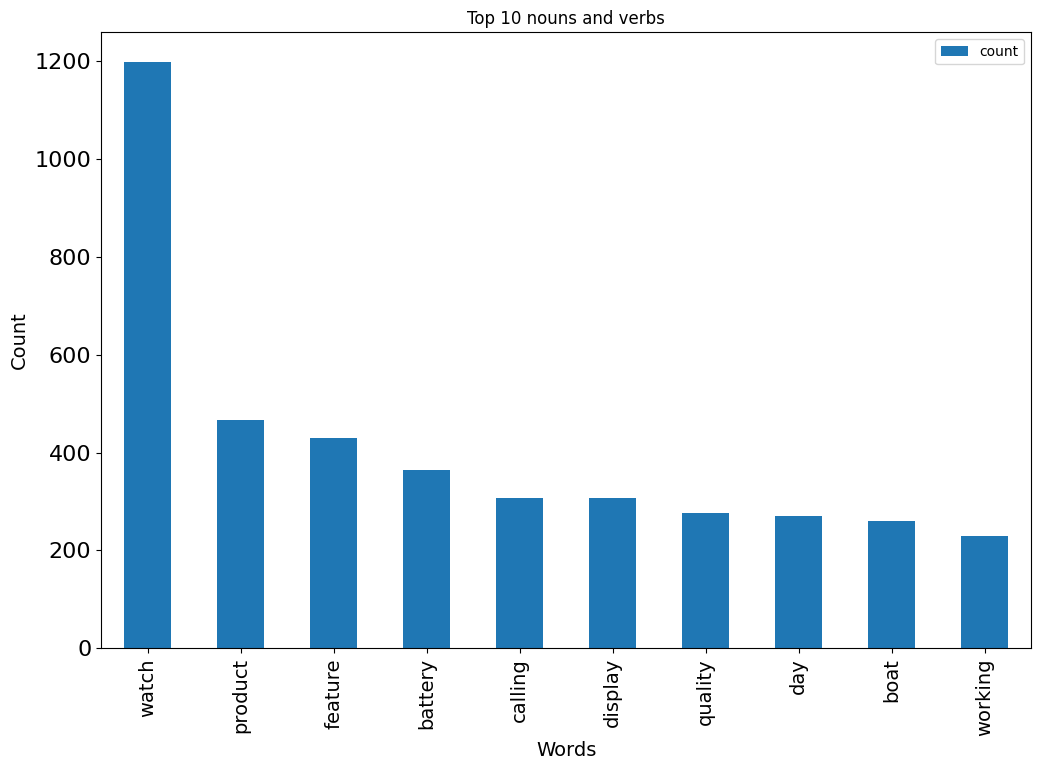

In [96]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Feature Extraction

A. BOW Features


In [98]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])



TF-IDF Features

In [99]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])


Fetch sentiments Using TextBlob

In [100]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [101]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

Clean_Reviews
pos           1309
neg            233

In [102]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  skipping part mostly covered review sponsored ...   
1  medium could loaded boat extend pro reviewshya...   
2  medium could loaded hello good day fan boat de...   
3  medium could loaded got watch today checked fe...   
4  battery life watch really incredible sound qua...   

                                   Uncleaned_Reviews  \
0  skipping parts mostly covered reviews sponsore...   
1  the media could loaded. boat extend pro review...   
2  the media could loaded. hello good day,i'm fan...   
3  the media could loaded. got watch today checke...   
4  the battery life watch really incredible sound...   

                                   Tokenized_Reviews  Subjectivity  Polarity  
0  [skipping, part, mostly, covered, review, spon...      0.441033 -0.001266  
1  [medium, could, loaded, boat, extend, pro, rev...      0.467800  0.225170  
2  [medium, could, loaded, hello, good, day, fan,...      0.453527  0.232312  
3  [medium, could, loaded, got, watch, today, che...      0.472312  0.316325  
4  [battery, life, watch, really, incredible, sou...      0.633333  0.666667

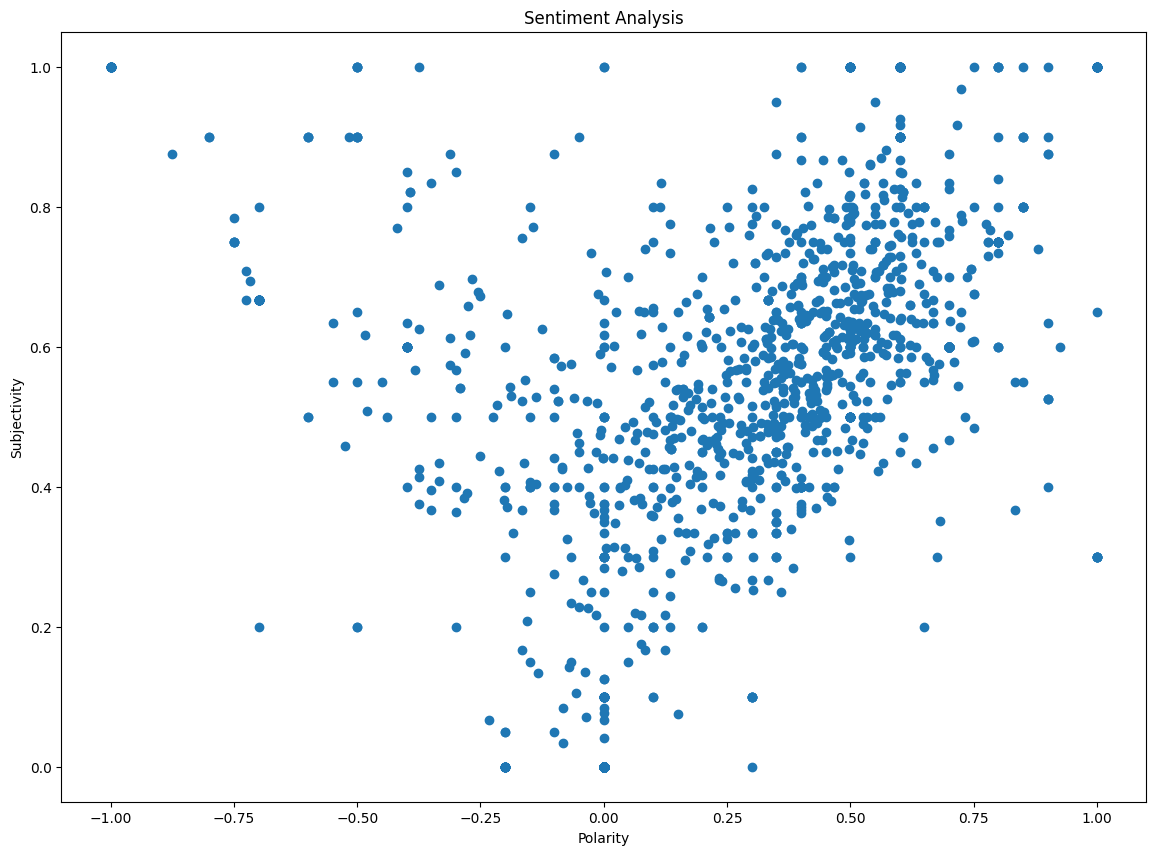

In [103]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [104]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0  skipping part mostly covered review sponsored ...   
1  medium could loaded boat extend pro reviewshya...   
2  medium could loaded hello good day fan boat de...   
3  medium could loaded got watch today checked fe...   
4  battery life watch really incredible sound qua...   

                                   Uncleaned_Reviews  \
0  skipping parts mostly covered reviews sponsore...   
1  the media could loaded. boat extend pro review...   
2  the media could loaded. hello good day,i'm fan...   
3  the media could loaded. got watch today checke...   
4  the battery life watch really incredible sound...   

                                   Tokenized_Reviews  Subjectivity  Polarity  \
0  [skipping, part, mostly, covered, review, spon...      0.441033 -0.001266   
1  [medium, could, loaded, boat, extend, pro, rev...      0.467800  0.225170   
2  [medium, could, loaded, hello, good, day, fan,...      0.453527  0.232312   
3  [medium, could, loaded, got, watch, today, che...      0.472312  0.316325   
4  [battery, life, watch, really, incredible, sou...      0.633333  0.666667   

  sentiment  
0       neg  
1       pos  
2       pos  
3       pos  
4       pos

Story Generation and Visualization

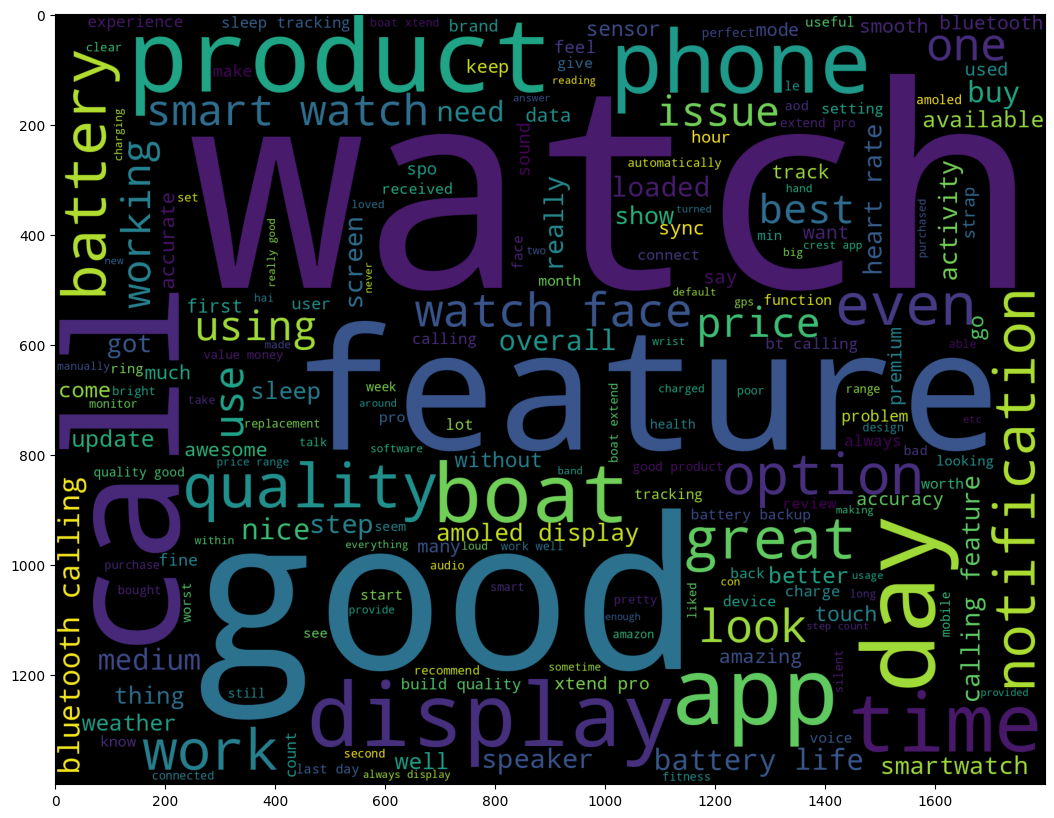

In [105]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

Most common words in positive Review

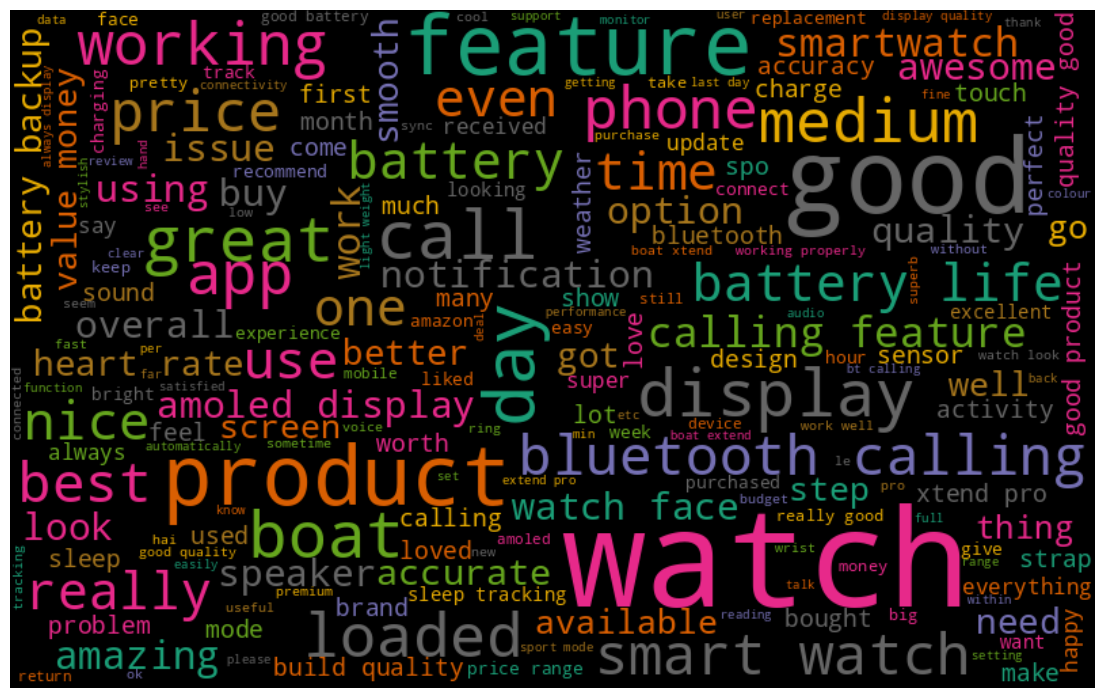

In [106]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

Most common words in negative Review

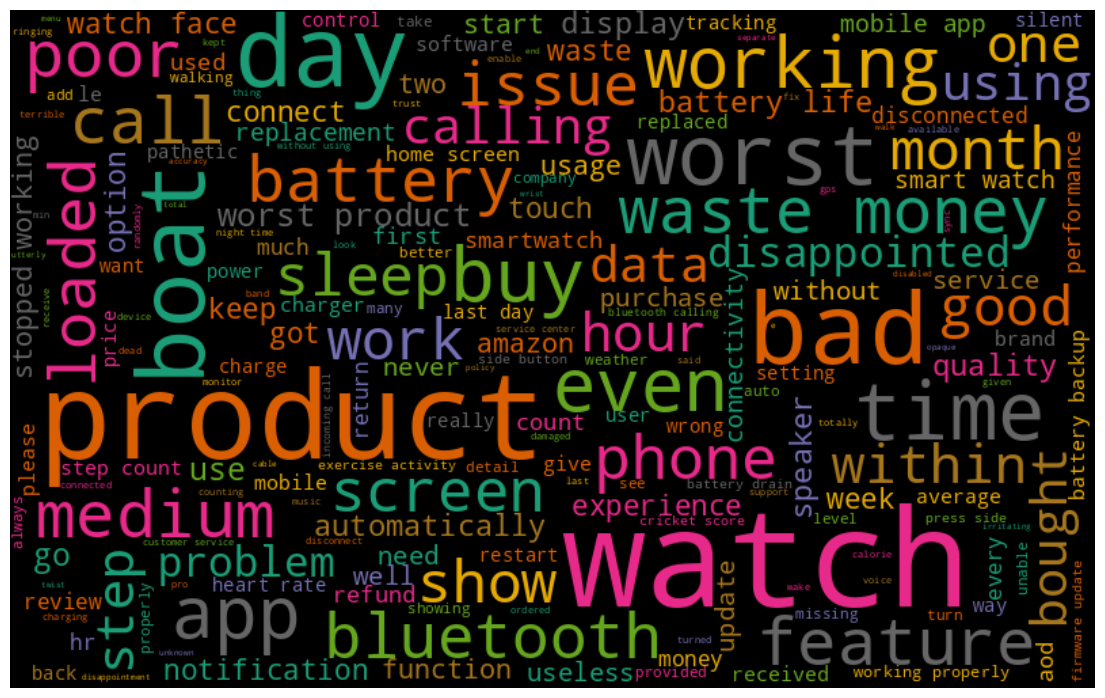

In [107]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)